# Data Exploratory Analysis
The following outlines the process I used to understand and analyze the dataset.

In [1]:
# The first step involves importing the libraries required for the process:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The graphics style selected is:
plt.style.use('ggplot')

# Statistical packages used
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu, f_oneway, kruskal, pearsonr

# Model packages used
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# The following allows us to view all the columns of the dataset, regardless of its size:
pd.set_option('display.max_columns', None)

In [3]:
# Then the dataset is loaded as:
corn = pd.read_csv("C://Users/jober/Data_Projects/corn-yield-prediction/Dataset/corn_data.csv", sep=";", )

## Step 1: Understanding the data
This step give us a general sense of the dataset: 

In [4]:
corn.shape

(422, 22)

In [5]:
corn.head()

,County,Farmer,Education,Gender,Age bracket,Household size,Crop,Acreage,Fertilizer amount,Laborers,Yield,Power source,Water source,Main credit source,Crop insurance,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language,Latitude,Longitude
0,TAITA TAVETA,fmr_65,Certificate,Male,36-45,7,corn,2.00,50,2,300,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.46,38.35
1,TAITA TAVETA,fmr_77,Certificate,Male,36-45,7,corn,0.25,50,2,270,Manual,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.31,38.40
2,TAITA TAVETA,fmr_89,Certificate,Male,36-45,7,corn,3.00,251,2,270,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.41,38.37
3,TAITA TAVETA,fmr_102,Certificate,Male,36-45,7,corn,1.50,300,3,200,Manual,Rain,Credit groups,No,Yes,Radio,County Government,SMS text,Kiswahili,-3.39,38.37
4,TAITA TAVETA,fmr_25,Certificate,Male,46-55,3,corn,NaN,50,2,180,Manual,Rain,Credit groups,No,Yes,Radio,Private Provider,Phone Calls,Vernacular,-3.39,38.33


In [6]:
corn.columns

Index(['County', 'Farmer', 'Education', 'Gender', 'Age bracket',
       'Household size', 'Crop', 'Acreage', 'Fertilizer amount', 'Laborers',
       'Yield', 'Power source', 'Water source', 'Main credit source',
       'Crop insurance', 'Farm records', 'Main advisory source',
       'Extension provider', 'Advisory format', 'Advisory language',
       'Latitude', 'Longitude'],
      dtype='object')

In [7]:
# Using the info() method, we can quickly identify the data type of each column and detect null values:"
corn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                422 non-null    object 
 1   Farmer                422 non-null    object 
 2   Education             396 non-null    object 
 3   Gender                422 non-null    object 
 4   Age bracket           422 non-null    object 
 5   Household size        422 non-null    int64  
 6   Crop                  422 non-null    object 
 7   Acreage               351 non-null    float64
 8   Fertilizer amount     422 non-null    int64  
 9   Laborers              422 non-null    int64  
 10  Yield                 422 non-null    int64  
 11  Power source          422 non-null    object 
 12  Water source          422 non-null    object 
 13  Main credit source    422 non-null    object 
 14  Crop insurance        422 non-null    object 
 15  Farm records          4

In [8]:
# The number of null values in the dataset is confirmed as:
corn.isna().sum()

County                   0
Farmer                   0
Education               26
Gender                   0
Age bracket              0
Household size           0
Crop                     0
Acreage                 71
Fertilizer amount        0
Laborers                 0
Yield                    0
Power source             0
Water source             0
Main credit source       0
Crop insurance           0
Farm records             0
Main advisory source     0
Extension provider       0
Advisory format          0
Advisory language        0
Latitude                 0
Longitude                0
dtype: int64

In [9]:
# The describe() function provides basic statistics for the numerical variables in the dataset:
corn.describe()

,Household size,Acreage,Fertilizer amount,Laborers,Yield,Latitude,Longitude
count,422.000000,351.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,4.263033,0.828063,65.189573,2.843602,232.604265,-3.417583,38.404455
std,1.706355,0.584884,65.754796,0.974348,135.376952,0.079007,0.094324
min,1.000000,0.250000,20.000000,2.000000,50.000000,-3.640000,38.270000
25%,3.000000,0.500000,25.000000,2.000000,100.000000,-3.490000,38.340000
50%,4.000000,0.500000,50.000000,3.000000,180.000000,-3.410000,38.370000
75%,5.000000,1.000000,75.000000,3.000000,330.000000,-3.360000,38.400000
max,9.000000,4.000000,500.000000,8.000000,600.000000,-3.250000,38.630000


## Step 2: Data preparation
Now that I have a general understanding of the data, some cleaning is needed before proceeding with further analysis.

In [10]:
# Checking for duplicates:
corn.duplicated().sum()

0

In [11]:
corn.loc[corn.duplicated(subset=['Farmer'])].shape

(0, 22)

In [12]:
# The column 'Farmer' indicates a unique record for each of the 422 platantion leader's.
corn['Farmer'].value_counts()

Farmer
fmr_65     1
fmr_219    1
fmr_72     1
fmr_71     1
fmr_368    1
          ..
fmr_410    1
fmr_371    1
fmr_274    1
fmr_254    1
fmr_200    1
Name: count, Length: 422, dtype: int64

Then there are no registries duplicated.

In [13]:
# In addition, the following columns are not useful for creating a predictive model because they return the same value for all rows, as shown below:
cols = ['County', 'Crop', 'Power source', 'Water source','Crop insurance']
for c in cols:
    print(corn[c].value_counts())

County
TAITA TAVETA    422
Name: count, dtype: int64
Crop
corn    422
Name: count, dtype: int64
Power source
Manual    422
Name: count, dtype: int64
Water source
Rain    422
Name: count, dtype: int64
Crop insurance
No    422
Name: count, dtype: int64


In [14]:
# Additionally, the columns 'Latitude' and 'Longitude' do not provide value due to their low variance within the analyzed county.

In [15]:
# Then, our subset selected for analysis is:
corn_subset = corn[['Education', 'Gender', 'Age bracket',
                    'Household size', 'Acreage', 'Fertilizer amount', 'Laborers',
                    'Yield', 'Main credit source', 'Farm records', 
                    'Main advisory source', 'Extension provider', 'Advisory format', 
                    'Advisory language']]
corn_subset.head()

,Education,Gender,Age bracket,Household size,Acreage,Fertilizer amount,Laborers,Yield,Main credit source,Farm records,Main advisory source,Extension provider,Advisory format,Advisory language
0,Certificate,Male,36-45,7,2.00,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.00,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.50,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular


In [16]:
# Column names in our refined dataframe are converted to lowercase, and spaces are removed for consistency and usability:
corn_subset.columns = [name.lower() for name in corn_subset.columns]
corn_subset.columns = [name.replace(" ","_") for name in corn_subset.columns]

In [17]:
corn_subset.head()

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
0,Certificate,Male,36-45,7,2.00,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.00,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.50,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular


In [18]:
# Then, let's see the null values
corn_subset.isna().sum()

education               26
gender                   0
age_bracket              0
household_size           0
acreage                 71
fertilizer_amount        0
laborers                 0
yield                    0
main_credit_source       0
farm_records             0
main_advisory_source     0
extension_provider       0
advisory_format          0
advisory_language        0
dtype: int64

In [19]:
# The null values in the 'acreage' column are:
corn_subset[corn_subset['acreage'].isna()]

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
4,Certificate,Male,46-55,3,NaN,50,2,180,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
13,Certificate,Male,46-55,5,NaN,20,3,135,Savings,No,Extension services,County Government,SMS text,English
16,Diploma,Female,46-55,5,NaN,25,2,160,Credit groups,Yes,Extension services,County Government,Phone Calls,Kiswahili
20,Diploma,Male,56-65,1,NaN,20,4,90,Credit groups,Yes,Radio,County Government,SMS text,English
23,Diploma,Male,56-65,1,NaN,48,2,75,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Secondary,Female,56-65,3,NaN,40,2,70,Credit groups,No,Radio,Private Provider,Phone Calls,Kiswahili
392,Secondary,Female,46-55,4,NaN,31,3,50,Credit groups,No,Radio,Private Provider,Phone Calls,English
399,NaN,Female,18-35,6,NaN,20,2,450,Credit groups,No,Public gatherings,County Government,SMS text,English
409,NaN,Female,36-45,6,NaN,50,2,270,Credit groups,No,Extension services,County Government,Phone Calls,Kiswahili


In [20]:
# The 71 entries lacking records of the amount of cultivated land are not useful for our objective. 
# Those registries represent:
missing_land = corn_subset['acreage'].isna().sum()
amount_ml = (missing_land / corn.shape[0])*100
print(f'The percentage of registries with missing values of cultivated land represent {amount_ml}')

The percentage of registries with missing values of cultivated land represent 16.824644549763033


While removing a large number of missing values is generally not advisable, the lack of access to the research team for clarification and the limited usefulness of this data for our model, these rows will be removed from the dataframe.

In [21]:
# The resulting dataframe is:
filter = corn_subset['acreage'].isna()
corn_subset = corn_subset[~filter]

In [22]:
# The null values in the 'education' columns are:
corn_subset[corn_subset['education'].isna()].shape

(23, 14)

It makes sense that farmers in a developing country might have little to no formal education. Therefore, we can reasonably infer that many of them have not achieved any formal academic qualifications.

In [23]:
# We populate the missing values in the education column with "No educated":
corn_subset.loc[corn_subset['education'].isna()] = corn_subset.loc[corn_subset['education'].isna()].fillna('No educated')

In [24]:
corn_subset['education'].value_counts()

education
Primary        195
Secondary      108
No educated     23
Certificate     13
Diploma          7
Degree           5
Name: count, dtype: int64

In [25]:
# Finally, our cleaned dataset does not contains missing values:
corn_subset.isna().sum()

education               0
gender                  0
age_bracket             0
household_size          0
acreage                 0
fertilizer_amount       0
laborers                0
yield                   0
main_credit_source      0
farm_records            0
main_advisory_source    0
extension_provider      0
advisory_format         0
advisory_language       0
dtype: int64

In [26]:
# The main statistics for out clean dataset are:
corn_subset.describe(include='all')

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
count,351,351,351,351.000000,351.000000,351.000000,351.000000,351.000000,351,351,351,351,351,351
unique,6,2,5,NaN,NaN,NaN,NaN,NaN,3,2,5,4,2,3
top,Primary,Female,36-45,NaN,NaN,NaN,NaN,NaN,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
freq,195,249,115,NaN,NaN,NaN,NaN,NaN,266,254,153,203,237,274
mean,NaN,NaN,NaN,4.319088,0.828063,63.720798,2.814815,243.618234,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.685452,0.584884,65.145346,0.921122,136.714560,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.250000,20.000000,2.000000,50.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,0.500000,25.000000,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,0.500000,50.000000,3.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,6.000000,1.000000,75.000000,3.000000,360.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3: Feature understanding

Now, it is important to understand how the selected variables behave:

### Target variable (Yield):

c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

<Axes: xlabel='yield', ylabel='Count'>

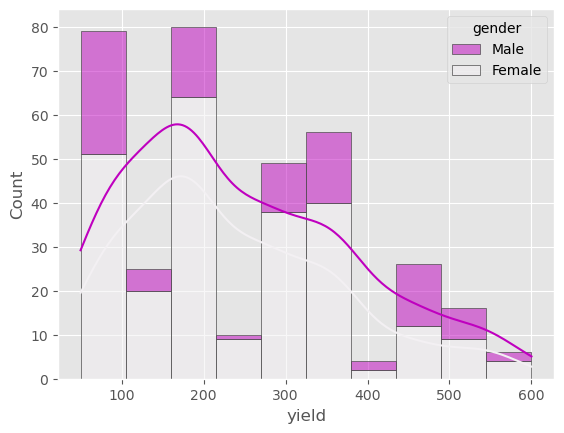

In [27]:
sns.histplot(
    corn_subset,
    x="yield", hue="gender",
    multiple="stack",
    kde=True,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

In [28]:
# The Central Tendency measures are
mean = corn_subset['yield'].mean()
median = corn_subset['yield'].median()
print(f"Mean: {mean}, Median: {median}")

# The Dispersion measures are
std_dev = corn_subset['yield'].std()
iqr = corn_subset['yield'].quantile(0.75) - corn_subset['yield'].quantile(0.25)
print(f"Standard Deviation: {std_dev}, IQR: {iqr}")

# The Shape measures are
skewness = corn_subset['yield'].skew()
kurtosis = corn_subset['yield'].kurt()
print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Mean: 243.61823361823363, Median: 200.0
Standard Deviation: 136.71456023727333, IQR: 210.0
Skewness: 0.5920366120821166, Kurtosis: -0.5150628368525387


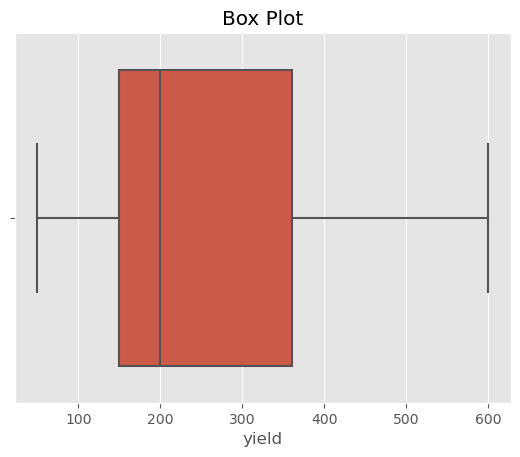

In [29]:
# The Outliers can be identifyed from a Boxplot
sns.boxplot(x=corn_subset['yield'])
plt.title('Box Plot')
plt.show()

There are no outliers visible at first glance.

- The variable 'education':

<Axes: xlabel='education', ylabel='yield'>

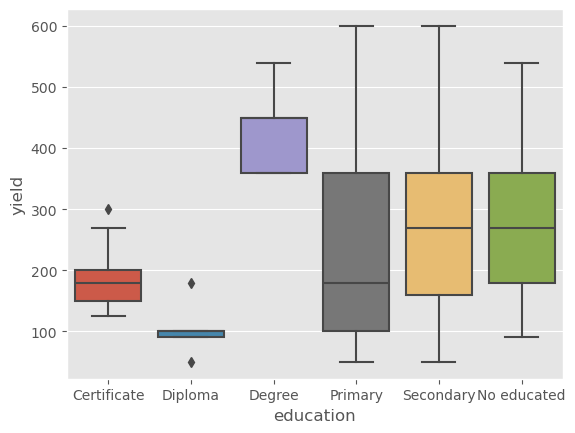

In [30]:
# The education variable behave as:
sns.boxplot(x=corn_subset['education'], y=corn_subset['yield'])

In [31]:
# To validate the variability in yield explained by the farmer's 'education', I'll execute a one-way anova 

# The firts step is spliting the categories in the column as follows:
groups = [group["yield"].values for name, group in corn_subset.groupby("education")]

# Then the actual ANOVA is performed using 
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

print(f"The p-value {p_value} is smaller than 0.05, then there is variability explained by the education of farmers.")
print("Thats why It's important to include  this variable in the model")

F-statistic: 4.838129883074475, P-value: 0.00027306321938453895
The p-value 0.00027306321938453895 is smaller than 0.05, then there is variability explained by the education of farmers.
Thats why It's important to include  this variable in the model


- The variable 'gender':

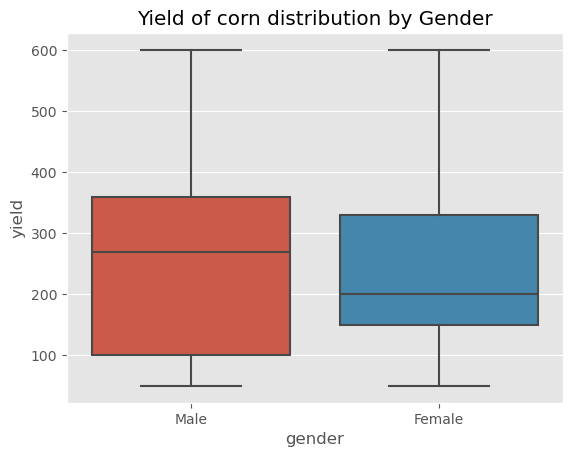

In [32]:
# The 'gender' variable behave as:
sns.boxplot(x="gender", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by Gender")
plt.show()

In [33]:
# Gruoping the dataframe using gender 
male_yield = corn_subset[corn_subset["gender"] == "Male"]["yield"]
female_yield = corn_subset[corn_subset["gender"] == "Female"]["yield"]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Yield of corn for Male:", shapiro(male_yield))
print("Yield of corn for Female:", shapiro(female_yield))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(male_yield, female_yield)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between genders [{p} is smaller than 0.05]')

Normality Test (Shapiro-Wilk):
Yield of corn for Male: ShapiroResult(statistic=0.9241487383842468, pvalue=1.970140147022903e-05)
Yield of corn for Female: ShapiroResult(statistic=0.9340603351593018, pvalue=4.104549145012015e-09)

Levene’s Test for Equal Variance:
Statistic: 14.10703328403133, P-value: 0.00020229504720311082
There is homogeinity of variance between genders [0.00020229504720311082 is smaller than 0.05]


In [34]:
# Use T-test
t_stat, t_p = ttest_ind(male_yield, female_yield, equal_var=True)
print("\nTwo-sample T-test:")
print(f"T-statistic: {t_stat}, P-value: {t_p}")


Two-sample T-test:
T-statistic: 1.6819565062645667, P-value: 0.09347176264933382


As identified, the calculated p-value of 0.0934717 is higher than 0.05. Therefore, there is no statistical difference between the genders of the farmers, and this variable will not be included in our first iteration of the models.

- Variable 'age_braket':

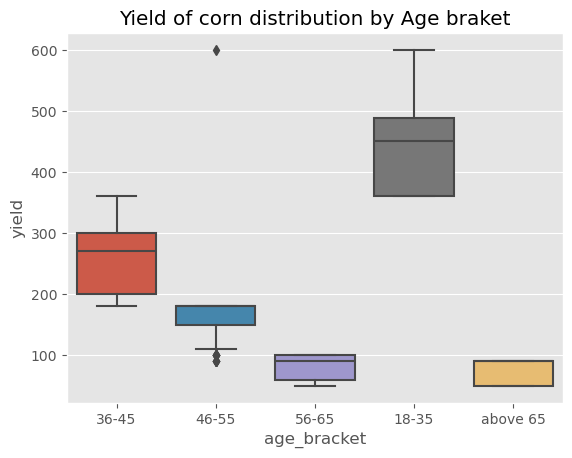

In [35]:
# The 'age_bracket' variable behave as:
sns.boxplot(x="age_bracket", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by Age braket")
plt.show()

In [36]:
# From the illustration above, I identifyed atypical data in the '46-55' age_bracket category. Then,
# I'll use the function described as:

def atypical_data (df, target, variable, label):

    segment_data = df[df[variable] == label][target]

    Q1 = segment_data.quantile(0.25)
    Q3 = segment_data.quantile(0.75)
    IQR = Q3 - Q1
    Inf_Limit = Q1 - (1.5*IQR)
    Sup_Limit = Q3 + (1.5*IQR)

    outliers = df[(df[variable] == label) & ((df[target] < Inf_Limit) | (df[target] > Sup_Limit))]
    
    return outliers

In [37]:
# The farmers between 46 and 55 years old with atypical production of corn are: 
aty_age = atypical_data(corn_subset, 'yield', 'age_bracket', '46-55')
aty_age.head(15)

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
19,Diploma,Female,46-55,5,0.50,20,3,100,Credit groups,Yes,Public gatherings,National Government,Phone Calls,Kiswahili
22,Diploma,Female,46-55,5,0.25,50,3,90,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
209,Primary,Female,46-55,2,0.75,20,4,100,Family,Yes,Extension services,County Government,SMS text,Kiswahili
210,Primary,Female,46-55,2,0.50,20,3,100,Credit groups,Yes,Extension services,County Government,SMS text,Kiswahili
214,Primary,Female,46-55,2,0.50,20,3,100,Credit groups,No,Public gatherings,National Government,Phone Calls,Kiswahili
240,Primary,Female,46-55,2,0.50,50,4,90,Credit groups,No,Public gatherings,Private Provider,Phone Calls,Kiswahili
270,Secondary,Male,46-55,1,4.00,300,8,600,Savings,No,Radio,County Government,SMS text,Kiswahili
375,Secondary,Female,46-55,4,0.75,25,3,100,Credit groups,Yes,Public gatherings,KALRO,SMS text,Kiswahili
382,Secondary,Female,46-55,5,0.30,25,3,100,Savings,No,Public gatherings,County Government,SMS text,Kiswahili
383,Secondary,Female,46-55,4,1.00,50,2,90,Credit groups,No,Extension services,Private Provider,Phone Calls,Kiswahili


While there is one row in the yield column with 600 units, this individual appears to have greater access to resources. He cultivate four times more land than others and use fertilizer more intensively. He also uses his own financial resources for farming. It is reasonable to infer that this farmer is wealthier than their peers. I concluded that there are no illogical entries in the dataset for this variable.

In [38]:
# The firts step is spliting the categories in the column as follows:
groups_age = [group["yield"].values for name, group in corn_subset.groupby("age_bracket")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("yield of 18-35:", shapiro(groups_age[0]))
print("yield of 36-45:", shapiro(groups_age[1]))
print("yield of 46-55:", shapiro(groups_age[2]))
print("yield of 56-65:", shapiro(groups_age[3]))
print("yield of above 65:", shapiro(groups_age[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_age)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between age brackets [{p} is smaller than 0.05]')

Normality Test (Shapiro-Wilk):
yield of 18-35: ShapiroResult(statistic=0.8395863771438599, pvalue=5.543294889776007e-08)
yield of 36-45: ShapiroResult(statistic=0.9041250944137573, pvalue=5.131573175276571e-07)
yield of 46-55: ShapiroResult(statistic=0.48733508586883545, pvalue=6.713705959714936e-16)
yield of 56-65: ShapiroResult(statistic=0.8015334606170654, pvalue=7.838396527404257e-07)
yield of above 65: ShapiroResult(statistic=0.590883731842041, pvalue=1.3296380529936869e-05)

Levene’s Test for Equal Variance:
Statistic: 12.843165533161223, P-value: 9.278764010475584e-10
There is homogeinity of variance between age brackets [9.278764010475584e-10 is smaller than 0.05]


In [39]:
# Then a one-way ANOVA is performed using 
f_stat, p_value = f_oneway(*groups_age)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

print(f"The p-value {p_value} is smaller than 0.05, then there is variability explained by the age of farmers.")
print("Thats why It's important to include  this variable in the model")

F-statistic: 442.83832687956397, P-value: 1.1520387424452078e-134
The p-value 1.1520387424452078e-134 is smaller than 0.05, then there is variability explained by the age of farmers.
Thats why It's important to include  this variable in the model


- Variable 'household_size': <br>
<br>
The values taken by the variable are:

In [40]:
print(corn_subset['household_size'].unique())
print('\n While those are numeric values, they are best treated as categories.')

[7 3 6 5 1 2 9 4 8]

 While those are numeric values, they are best treated as categories.


In [41]:
#Transformation of the data type in the variable 'household_size':
corn_subset['household_size'] = corn_subset['household_size'].apply(str)

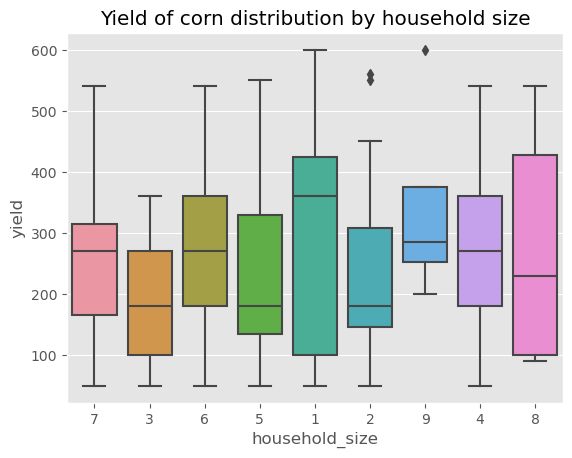

In [42]:
# Now, the 'household_size' variable behave as:
sns.boxplot(x="household_size", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by household size")
plt.show()

In [43]:
# As evaluated in the age_bracket variable, the are some possible outliers at second and nineth categories. Then,
aty_hs_2 = atypical_data(corn_subset, 'yield', 'household_size', '2')
aty_hs_2

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
41,Primary,Female,18-35,2,0.5,40,3,560,Savings,No,Extension services,County Government,SMS text,Kiswahili
272,Secondary,Male,18-35,2,2.0,150,2,550,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili


In [44]:
# And also:
aty_hs_9 = atypical_data(corn_subset, 'yield', 'household_size', '9')
aty_hs_9

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
40,Primary,Female,18-35,9,1.0,50,3,600,Credit groups,No,Public gatherings,Private Provider,Phone Calls,Kiswahili


These are records of farmers that break the consistency of the dataframe, particularly due to the small number of laborers they use. Therefore, it is reasonable to classify them as outliers that should be removed.

In [45]:
# Merging the 2 subsets of outliers:
aty_hs_merged = pd.concat([aty_hs_2, aty_hs_9], axis=0, ignore_index=False)
aty_hs_merged
# Dropping the outliers
corn_subset = corn_subset.drop(aty_hs_merged.index)

In [46]:
# Let's continue the same procedure for categorical variables as before:
groups_hsize = [group["yield"].values for name, group in corn_subset.groupby("household_size")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_hsize):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_hsize)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between household size [{p} is smaller than 0.05]')

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.8795545697212219, pvalue=0.04672493413090706)
yield of 1: ShapiroResult(statistic=0.9173285961151123, pvalue=0.008162393234670162)
yield of 2: ShapiroResult(statistic=0.9358439445495605, pvalue=0.0026786376256495714)
yield of 3: ShapiroResult(statistic=0.9325151443481445, pvalue=0.002094114199280739)
yield of 4: ShapiroResult(statistic=0.9219567179679871, pvalue=0.00010677475074771792)
yield of 5: ShapiroResult(statistic=0.9473256468772888, pvalue=0.007819188758730888)
yield of 6: ShapiroResult(statistic=0.9634010195732117, pvalue=0.7512395977973938)
yield of 7: ShapiroResult(statistic=0.8280540108680725, pvalue=0.1034771054983139)
yield of 8: ShapiroResult(statistic=0.9493671655654907, pvalue=0.566536603762676)

Levene’s Test for Equal Variance:
Statistic: 4.181869419648638, P-value: 8.630420474869085e-05
There is homogeinity of variance between household size [8.630420474869085e-05 is smaller than 0.05]


In [47]:
# Some of the household sizes does not follow a normal distribution. 
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):

stat, p = kruskal(*groups_hsize)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 15.880820122870858, P-value: 0.044118057103630565


The P-value calculated 0.044118057103630565 is smaller than 0.05, then tehre is variability explained by the number of households in the dataset. Therefore, This variable should be included in the model.

- Variable 'laborers':


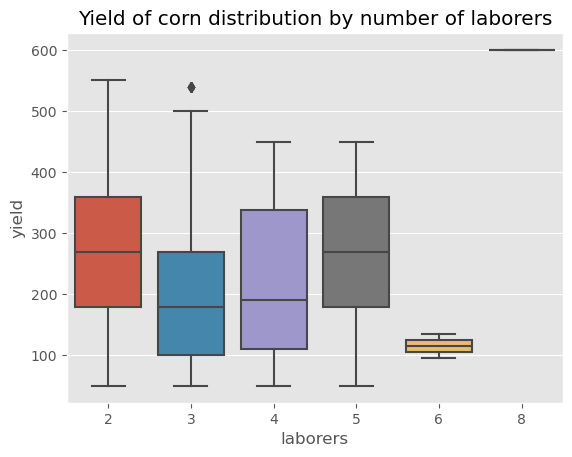

In [48]:
# Now, the 'laborers' variable behave as:
sns.boxplot(x="laborers", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by number of laborers")
plt.show()

In [49]:
#Transformation of the data type in the variable 'laborers':
corn_subset['laborers'] = corn_subset['laborers'].apply(str)

# The are some possible outliers in the category of '3' outliers. Then,
aty_lb_3 = atypical_data(corn_subset, 'yield', 'laborers', '3')
aty_lb_3

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
26,Degree,Male,18-35,6,0.5,20,3,540,Credit groups,No,Radio,Private Provider,Phone Calls,Kiswahili
44,Primary,Female,18-35,4,2.0,50,3,540,Credit groups,No,Extension services,County Government,Phone Calls,Kiswahili
46,Primary,Male,18-35,5,0.5,20,3,540,Credit groups,No,Radio,County Government,Phone Calls,Kiswahili
47,Primary,Female,18-35,4,0.5,25,3,540,Credit groups,No,Extension services,Private Provider,SMS text,Kiswahili
48,Primary,Female,18-35,4,1.0,50,3,540,Family,Yes,Radio,Private Provider,Phone Calls,Vernacular
50,Primary,Male,18-35,6,0.5,100,3,540,Credit groups,No,Public gatherings,County Government,Phone Calls,Kiswahili
274,Secondary,Male,18-35,8,0.5,20,3,540,Savings,No,Extension services,County Government,Phone Calls,Kiswahili


However, I have no arguments to eliminate those registries from the dataset. Therefore, I will keep it for now.

In [50]:
# Let's continue the same procedure for categorical variables as before:
groups_laborers = [group["yield"].values for name, group in corn_subset.groupby("laborers")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_laborers):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_laborers)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There isn't homogeinity of variance between number of laborers [{p} is greater than 0.05]")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.9531834721565247, pvalue=5.1066421292489395e-05)
yield of 1: ShapiroResult(statistic=0.8836978077888489, pvalue=1.049409448228289e-08)
yield of 2: ShapiroResult(statistic=0.9193204641342163, pvalue=0.0045183864422142506)
yield of 3: ShapiroResult(statistic=0.9056992530822754, pvalue=0.08465549349784851)
error at 4:
error at 5:

Levene’s Test for Equal Variance:
Statistic: 0.777665024360423, P-value: 0.5663373611801408
There isn't homogeinity of variance between number of laborers [0.5663373611801408 is greater than 0.05]


In [51]:
# The assumption of normally distributed data could not be proven, and there is no evidence of heteroscedasticity. 
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):

stat, p = kruskal(*groups_laborers)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 11.81765698264309, P-value: 0.03737355155094598


The P-value calculated 0.03737355155094598 is smaller than 0.05, then there is variability explained by the number of laborers used for corn production. Therefore, This variable should be included in the model.

- Variable 'main_credit_source': 

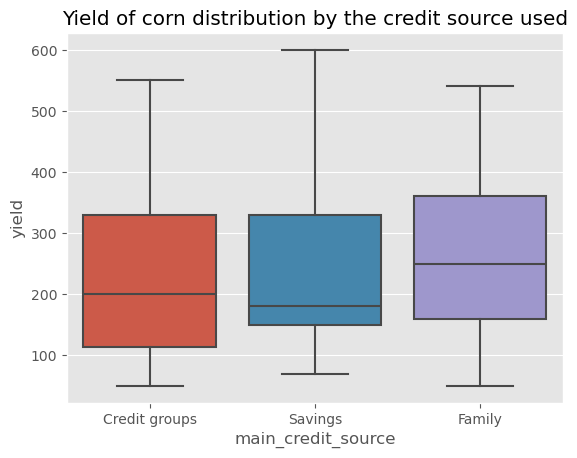

In [52]:
# Now, the 'main_credit_source' variable behave as:
sns.boxplot(x="main_credit_source", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by the credit source used")
plt.show()

In [53]:
# Let's continue the same procedure for categorical variables as before:
groups_credit = [group["yield"].values for name, group in corn_subset.groupby("main_credit_source")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_credit):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_credit)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There are unequal variances between credit source types because [{p} is greater than 0.05]")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.9367485046386719, pvalue=3.2421196838328115e-09)
yield of 1: ShapiroResult(statistic=0.9326149821281433, pvalue=0.001920896116644144)
yield of 2: ShapiroResult(statistic=0.8819704055786133, pvalue=0.015891628339886665)

Levene’s Test for Equal Variance:
Statistic: 1.1363844765604671, P-value: 0.32217585973230534
There are unequal variances between credit source types because [0.32217585973230534 is greater than 0.05]


In [54]:
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):
stat, p = kruskal(*groups_credit)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 2.7124829702940683, P-value: 0.2576272554200043


The p-value of 0.257627 calculated above is greater than 0.05; therefore, there is no significant impact on corn production due to the source of credit used by the farmers.

- Variable 'farm_records':

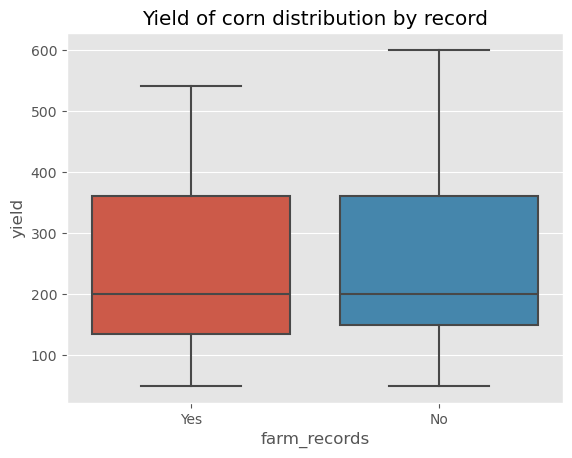

In [55]:
# Now, the 'farm_records' variable behave as:
sns.boxplot(x="farm_records", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by record")
plt.show()

In [56]:
# Let's continue the same procedure for categorical variables as before:
farm_wr = corn_subset[corn_subset['farm_records'] == 'Yes']['yield']
farm_wnr = corn_subset[corn_subset['farm_records'] == 'No']['yield']

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Yield of corn for farms with records:", shapiro(farm_wr))
print("Yield of corn for farms without records:", shapiro(farm_wnr))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(farm_wr, farm_wnr)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There are unequal variances between both groups because [{p} is greater than 0.05]")

Normality Test (Shapiro-Wilk):
Yield of corn for farms with records: ShapiroResult(statistic=0.9375982880592346, pvalue=0.00017543781723361462)
Yield of corn for farms without records: ShapiroResult(statistic=0.9339780211448669, pvalue=3.6114335966175304e-09)

Levene’s Test for Equal Variance:
Statistic: 0.009050288756066782, P-value: 0.9242642534392604
There are unequal variances between both groups because [0.9242642534392604 is greater than 0.05]


In [57]:
# Then, I'll apply the non-parametric alternative test for comparaison (U Mann-Withney Test):
stat, p = mannwhitneyu(farm_wr, farm_wnr, alternative='two-sided')
print(f"U-statistic: {stat}, P-value: {p}")

U-statistic: 12163.0, P-value: 0.9904699265948796


The p-value of 0.9900469 calculated above is greater than 0.05; therefore, there is no significant impact on corn production due to the practice of keeping records in the plantations.

- Variable 'main_advisory_source':

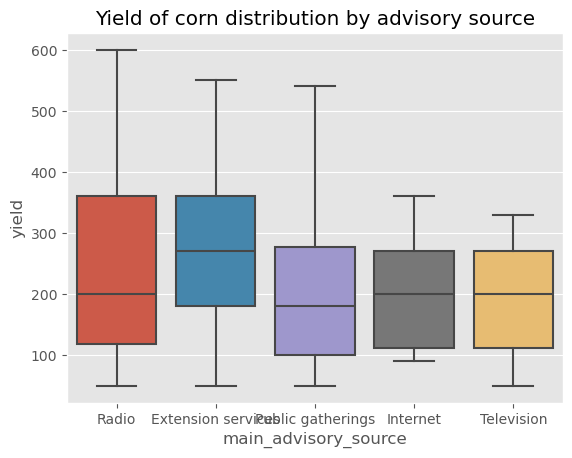

In [58]:
# Now, the 'main_advisory_source' variable behave as:
sns.boxplot(x="main_advisory_source", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by advisory source")
plt.show()

In [59]:
# Let's continue the same procedure for categorical variables as before:
groups_adv = [group["yield"].values for name, group in corn_subset.groupby("main_advisory_source")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_adv):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_adv)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There are unequal variances between different advisory groups because {p} is greater than 0.05")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.9391025900840759, pvalue=0.00044431351125240326)
yield of 1: ShapiroResult(statistic=0.891899824142456, pvalue=0.1781221181154251)
yield of 2: ShapiroResult(statistic=0.9071366190910339, pvalue=1.0544154974923003e-05)
yield of 3: ShapiroResult(statistic=0.9364785552024841, pvalue=2.513865638320567e-06)
yield of 4: ShapiroResult(statistic=0.9266844987869263, pvalue=0.416083961725235)

Levene’s Test for Equal Variance:
Statistic: 1.2911396532844712, P-value: 0.27313675248966346
There are unequal variances between different advisory groups because 0.27313675248966346 is greater than 0.05


In [60]:
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):
stat, p = kruskal(*groups_adv)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 12.526935380979374, P-value: 0.013834216039429878


The calculated p-value 0.01383421 is smaller than 0.05, then the variable of advisory group will be included in the model.

- Variable 'extension_provider':

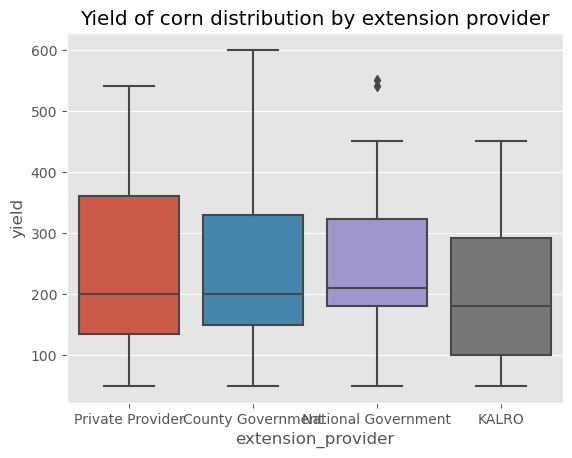

In [61]:
# Now, the 'extension_provider' variable behave as:
sns.boxplot(x="extension_provider", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by extension provider")
plt.show()

In [62]:
aty_gv = atypical_data(corn_subset, 'yield', 'extension_provider', 'National Government' )
aty_gv

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
271,Secondary,Female,18-35,5,2.0,150,2,550,Credit groups,No,Extension services,National Government,SMS text,Vernacular
397,No educated,Male,18-35,4,2.0,60,2,540,Family,No,Public gatherings,National Government,SMS text,Kiswahili


In [63]:
# Dropping the outliers for extension provider
corn_subset = corn_subset.drop(aty_gv.index)
corn_subset.shape

(346, 14)

In [64]:
# Let's continue the same procedure for categorical variables as before:
groups_ext = [group["yield"].values for name, group in corn_subset.groupby("extension_provider")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_ext):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_ext)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There are unequal variances between different extension provider because {p} is greater than 0.05")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.9403187036514282, pvalue=2.3038089125293482e-07)
yield of 1: ShapiroResult(statistic=0.9071645736694336, pvalue=0.19619329273700714)
yield of 2: ShapiroResult(statistic=0.9508952498435974, pvalue=0.1528068631887436)
yield of 3: ShapiroResult(statistic=0.9251630902290344, pvalue=2.4474853489664383e-05)

Levene’s Test for Equal Variance:
Statistic: 1.540950776739752, P-value: 0.20366351336577657
There are unequal variances between different extension provider because 0.20366351336577657 is greater than 0.05


In [65]:
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):
stat, p = kruskal(*groups_ext)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 1.517376409217919, P-value: 0.6782657102349303


The p-value of 0.67826571 calculated above is greater than 0.05; therefore, there is no significant impact on corn production based on the group extension.

- Variable 'advisory_format':

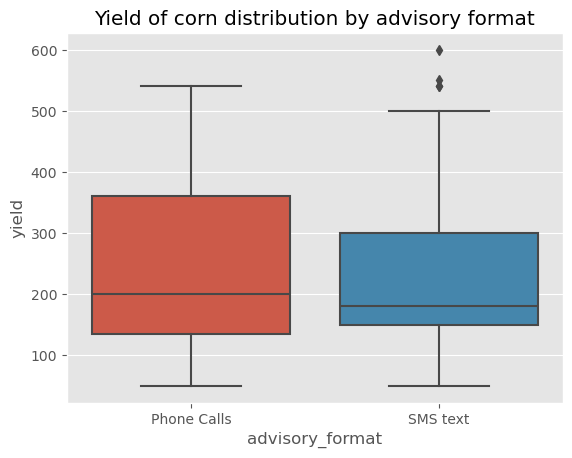

In [66]:
# Now, the 'advisory_format' variable behave as:
sns.boxplot(x="advisory_format", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by advisory format")
plt.show()

In [67]:
# Let's continue the same procedure for categorical variables as before:
groups_fmt = [group["yield"].values for name, group in corn_subset.groupby("advisory_format")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_fmt):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_fmt)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There are unequal variances between different advisory format because {p} is greater than 0.05")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.9398419260978699, pvalue=3.032228690358352e-08)
yield of 1: ShapiroResult(statistic=0.9192295074462891, pvalue=4.750366770167602e-06)

Levene’s Test for Equal Variance:
Statistic: 2.855143880105982, P-value: 0.09198808574822054
There are unequal variances between different advisory format because 0.09198808574822054 is greater than 0.05


In [68]:
# Then, I'll apply the non-parametric alternative test for comparaison (U Mann-Withney Test):
stat, p = mannwhitneyu(groups_fmt[0], groups_fmt[1], alternative='two-sided')
print(f"U-statistic: {stat}, P-value: {p}")

U-statistic: 13833.0, P-value: 0.3605410661532924


The p-value of 0.360541 calculated above is greater than 0.05; therefore, there is no significant impact on corn production based on the advisory format.

- Variable 'advisory_language':

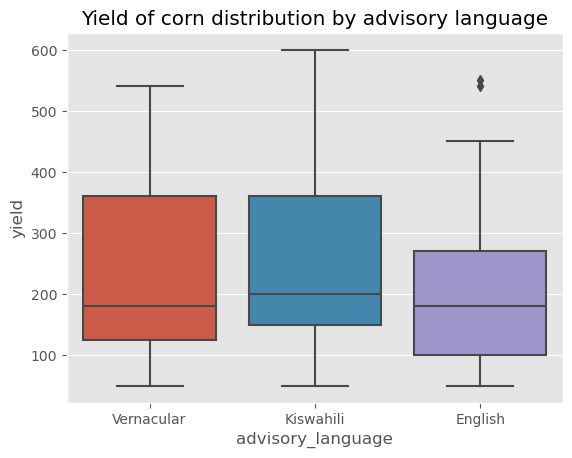

In [69]:
# Now, the 'advisory_language' variable behave as:
sns.boxplot(x="advisory_language", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by advisory language")
plt.show()

In [70]:
# Let's continue the same procedure for categorical variables as before:
groups_lang = [group["yield"].values for name, group in corn_subset.groupby("advisory_language")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_lang):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_lang)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There are unequal variances between different advisory format because {p} is greater than 0.05")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.8664231300354004, pvalue=0.00027476740069687366)
yield of 1: ShapiroResult(statistic=0.9455794095993042, pvalue=1.8432340098684108e-08)
yield of 2: ShapiroResult(statistic=0.9077150821685791, pvalue=0.004863396752625704)

Levene’s Test for Equal Variance:
Statistic: 1.6964296795946148, P-value: 0.1848714981591851
There are unequal variances between different advisory format because 0.1848714981591851 is greater than 0.05


In [71]:
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):
stat, p = kruskal(*groups_lang)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 3.811734803290807, P-value: 0.1486936095868804


The p-value of 0.1486936 calculated above is greater than 0.05; therefore, there is no significant impact on corn production based on the advisory language.

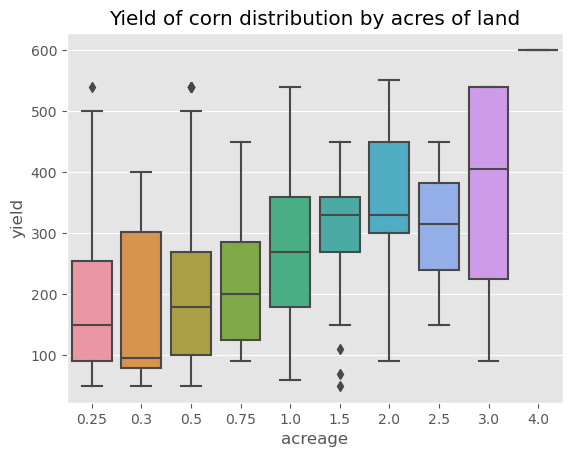

In [72]:
# Now, the 'acreage' variable behave as:
sns.boxplot(x="acreage", y="yield", data=corn_subset)
plt.title("Yield of corn distribution by acres of land")
plt.show()

In [73]:
#Transformation of the data type in the variable 'acreage':
corn_subset['acreage'] = corn_subset['acreage'].apply(str)

# The are some possible outliers in the category of '3' outliers. Then,
aty_ac_15 = atypical_data(corn_subset, 'yield', 'acreage', '1.5')
aty_ac_15 

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
197,Primary,Female,46-55,4,1.5,50,3,110,Credit groups,No,Public gatherings,County Government,Phone Calls,Kiswahili
250,Primary,Female,56-65,5,1.5,50,2,70,Savings,No,Television,County Government,Phone Calls,English
395,Secondary,Female,56-65,3,1.5,50,2,50,Credit groups,Yes,Radio,County Government,SMS text,English


The farmers identifyed previously produce less yield than its peers in the category; however, the amount of laborers used is typical and the fertilizer amount used represent the median value of the category. Then, those registries are considered as insiders and will not be removed.

In [74]:
# Let's continue the same procedure for categorical variables as before:
groups_acr = [group["yield"].values for name, group in corn_subset.groupby("acreage")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
for position, value in enumerate(groups_acr):
    try:
        print(f"yield of {position}:", shapiro(value))
    except:
        print(f"error at {position}:")

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_acr)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There are unequal variances depending on the amount of land cultivated because {p} is greater than 0.05")

Normality Test (Shapiro-Wilk):
yield of 0: ShapiroResult(statistic=0.8506397604942322, pvalue=1.7175175344164018e-06)
yield of 1: ShapiroResult(statistic=0.7794412970542908, pvalue=0.017177872359752655)
yield of 2: ShapiroResult(statistic=0.8740692138671875, pvalue=5.2044960341390833e-08)
yield of 3: ShapiroResult(statistic=0.8994284272193909, pvalue=0.04750753566622734)
yield of 4: ShapiroResult(statistic=0.9442641735076904, pvalue=0.00047770404489710927)
yield of 5: ShapiroResult(statistic=0.8950108289718628, pvalue=0.014309423044323921)
yield of 6: ShapiroResult(statistic=0.9587637186050415, pvalue=0.5482725501060486)
yield of 7: ShapiroResult(statistic=0.9925343990325928, pvalue=0.9700712561607361)
yield of 8: ShapiroResult(statistic=0.8603793382644653, pvalue=0.2615744173526764)
error at 9:

Levene’s Test for Equal Variance:
Statistic: 0.9546984933278563, P-value: 0.477660946822025
There are unequal variances depending on the amount of land cultivated because 0.477660946822025 is 

In [75]:
# Then, I'll apply the non-parametric alternative test for comparaison (Kruskal-Wallis Test):
stat, p = kruskal(*groups_acr)
print("\nKruskal-Wallis H Test:")
print(f"U-statistic: {stat}, P-value: {p}")


Kruskal-Wallis H Test:
U-statistic: 56.79385227491996, P-value: 5.534177350855362e-09


The amount of cultivable land used in production was proven to be a variable that explain a lot of corn yield because the p-value calculated was almost zero.

In [76]:
# The groups can be checked as:
for name, group in corn_subset.groupby("advisory_language"):
    print(f"advisory_language {name}: {group['yield'].values}")

advisory_language English: [180 100  90 550 450 360 360 270 200 200 180 180 160 160 150 115 100  90
  90  90  80  70 540 330 270 270 270 200 200 180 180 180 150 150 100  70
  50 360 180]
advisory_language Kiswahili: [270 200 180 180 180 150 135 180 100 100  90  90  50 540 450 450 360 360
 360 360 180  50 540 540 540 540 540 540 500 450 450 450 450 450 450 450
 450 450 450 450 440 400 400 360 360 360 360 360 360 360 360 360 360 360
 360 360 360 360 360 360 360 330 330 330 330 330 330 300 270 270 270 270
 270 270 270 270 270 270 270 270 270 270 270 270 270 270 270 250 250 250
 250 250 220 200 200 200 200 180 180 180 180 180 180 180 180 180 180 180
 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180 180
 150 150 135 135 110 100 100 100 100 100 100 100 100 100 100 100 100 100
  95  90  90  90  90  90  90  90  90  90  90  90  80  80  80  80  75  60
  60  60  50  50  50  50  50  50  50  50  50 600 540 500 450 450 450 450
 450 450 450 450 360 360 360 360 360 360 360 360 360 3

### Additionally, the continuous variables are visualized as follows:

c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


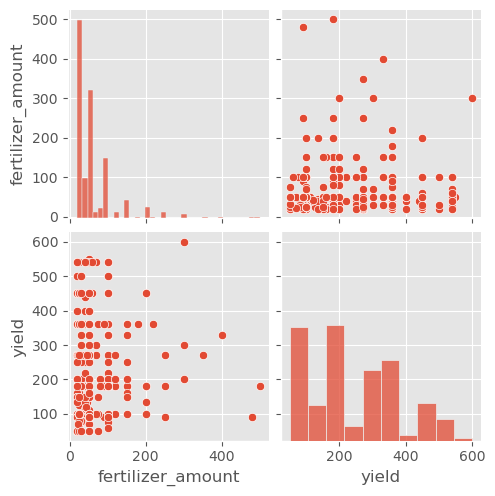

In [77]:
sns.pairplot(corn_subset)

- Variable 'fertilizer_amount':

<Axes: title={'center': 'Yield of corn by land'}, xlabel='fertilizer_amount', ylabel='yield'>

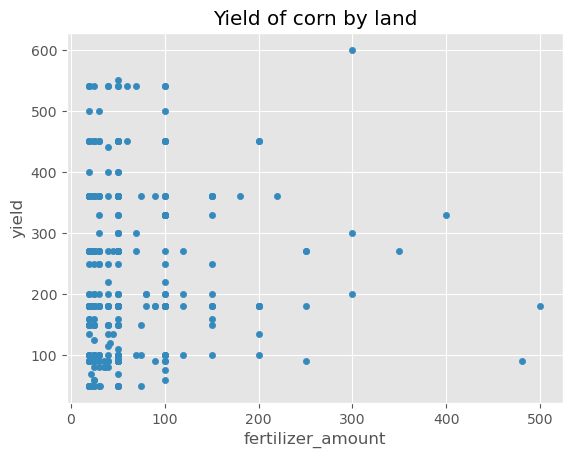

In [78]:
# The variable 'acreage' can be visualized as:
corn_subset.plot(kind='scatter', x = 'fertilizer_amount', y = 'yield',
                 title='Yield of corn by land')

In [79]:
# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print(f"fertilizer:", shapiro(corn_subset['fertilizer_amount']))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(corn_subset['fertilizer_amount'], corn_subset['yield'])
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f"There is heterocedasticity depending on the amount of fertilizer used because {p} is smaller than 0.05")

Normality Test (Shapiro-Wilk):
fertilizer: ShapiroResult(statistic=0.6333056688308716, pvalue=1.4919475159180248e-26)

Levene’s Test for Equal Variance:
Statistic: 180.56132359352995, P-value: 9.856741597312415e-37
There is heterocedasticity depending on the amount of fertilizer used because 9.856741597312415e-37 is smaller than 0.05


In [80]:
# The correlation of the numerical variables is stimated by the Test of Pearson:
pearsonr(x=corn_subset['yield'], y=corn_subset['fertilizer_amount'], 
         alternative='two-sided', method=None)

PearsonRResult(statistic=0.05156610460600026, pvalue=0.33889526051561386)

The variable is moderately and positively correlated with our target variable (yield). Therefore, it will be included in our model.

The final cleaned data is the following:

In [81]:
corn_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 421
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   education             346 non-null    object
 1   gender                346 non-null    object
 2   age_bracket           346 non-null    object
 3   household_size        346 non-null    object
 4   acreage               346 non-null    object
 5   fertilizer_amount     346 non-null    int64 
 6   laborers              346 non-null    object
 7   yield                 346 non-null    int64 
 8   main_credit_source    346 non-null    object
 9   farm_records          346 non-null    object
 10  main_advisory_source  346 non-null    object
 11  extension_provider    346 non-null    object
 12  advisory_format       346 non-null    object
 13  advisory_language     346 non-null    object
dtypes: int64(2), object(12)
memory usage: 40.5+ KB


In [82]:
corn_subset.head()

,education,gender,age_bracket,household_size,acreage,fertilizer_amount,laborers,yield,main_credit_source,farm_records,main_advisory_source,extension_provider,advisory_format,advisory_language
0,Certificate,Male,36-45,7,2.0,50,2,300,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
1,Certificate,Male,36-45,7,0.25,50,2,270,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
2,Certificate,Male,36-45,7,3.0,251,2,270,Credit groups,Yes,Radio,Private Provider,Phone Calls,Vernacular
3,Certificate,Male,36-45,7,1.5,300,3,200,Credit groups,Yes,Radio,County Government,SMS text,Kiswahili
5,Certificate,Male,46-55,3,0.5,200,2,180,Credit groups,Yes,Radio,National Government,Phone Calls,Kiswahili


In [83]:
categorical_columns = ['education', 'age_bracket', 'household_size', 'laborers', 
                       'main_advisory_source', 'acreage']

# The significant variables identifyed were:
significant_var = ['education', 'age_bracket', 'household_size', 'laborers', 'main_advisory_source', 
               'acreage', 'fertilizer_amount', 'yield']

# The not significant variables identifyed were:
not_significant_var = ['gender', 'main_credit_source', 'farm_records', 'extension_provider', 
                       'advisory_format', 'advisory_language']

## Step 4: Model identification
The cleaned dataset is filtered to include the significant variables identified above.

In [84]:
corn_cleaned = corn_subset[significant_var]
corn.reset_index
corn_cleaned.head()

,education,age_bracket,household_size,laborers,main_advisory_source,acreage,fertilizer_amount,yield
0,Certificate,36-45,7,2,Radio,2.0,50,300
1,Certificate,36-45,7,2,Radio,0.25,50,270
2,Certificate,36-45,7,2,Radio,3.0,251,270
3,Certificate,36-45,7,3,Radio,1.5,300,200
5,Certificate,46-55,3,2,Radio,0.5,200,180


Working dataset is prepared and splitted as follows:

In [85]:
# Preparation dataset
# data_encoded = pd.get_dummies(corn_cleaned, columns=categorical_columns, drop_first=True)

X = corn_cleaned.drop('yield', axis=1)
y = corn_cleaned['yield']

# Turning the dataframes into dictionaries:
X_dic = X.to_dict(orient='records')

In [86]:
# The data is transformed to dictionaries as:
X_dic[0]

{'education': 'Certificate',
 'age_bracket': '36-45',
 'household_size': '7',
 'laborers': '2',
 'main_advisory_source': 'Radio',
 'acreage': '2.0',
 'fertilizer_amount': 50}

In [87]:
# Instanciating the vectorizer for Hot Encoding:
dv = DictVectorizer(sparse=False)

# Applying the vectorizer:
X_encoded = dv.fit_transform(X_dic)

In [88]:
# The vectorized rows are transformed to the form of:
print(f'The column names are: {dv.get_feature_names_out()}')
print('\n The first element of the transformed dataset is: ')
X_encoded[0]

The column names are: ['acreage=0.25' 'acreage=0.3' 'acreage=0.5' 'acreage=0.75' 'acreage=1.0'
 'acreage=1.5' 'acreage=2.0' 'acreage=2.5' 'acreage=3.0' 'acreage=4.0'
 'age_bracket=18-35' 'age_bracket=36-45' 'age_bracket=46-55'
 'age_bracket=56-65' 'age_bracket=above 65' 'education=Certificate'
 'education=Degree' 'education=Diploma' 'education=No educated'
 'education=Primary' 'education=Secondary' 'fertilizer_amount'
 'household_size=1' 'household_size=2' 'household_size=3'
 'household_size=4' 'household_size=5' 'household_size=6'
 'household_size=7' 'household_size=8' 'household_size=9' 'laborers=2'
 'laborers=3' 'laborers=4' 'laborers=5' 'laborers=6' 'laborers=8'
 'main_advisory_source=Extension services' 'main_advisory_source=Internet'
 'main_advisory_source=Public gatherings' 'main_advisory_source=Radio'
 'main_advisory_source=Television']

 The first element of the transformed dataset is: 


array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.])

Dataset splitted as follows: 60% for training, 20% for validation, and 20% for testing.

In [89]:
# We first split for testing
X_full_train, X_test, y_full_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
# Then we split again for validation
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

# The lenght of the datasets can be validated as:
print(f'The number of registries in the train dataset is {len(X_train)}, in the validation dataset is {len(X_val)}, and in the test dataset is {len(X_test)}.')


The number of registries in the train dataset is 207, in the validation dataset is 69, and in the test dataset is 70.


### - Let's try some models:

__1. Linear Regression Model:__

In [90]:
# The model is trained as follows:
linear = LinearRegression()
linear.fit(X_train, y_train)

# The trained model is used to predict the values in the test dataset:
y_pred_val = linear.predict(X_val)

# The main indicator for assessing the validity of the model is the Root Mean Squared Error (RMSE).
print("Linear Regression Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("R² Score:", r2_score(y_val, y_pred_val))

Linear Regression Metrics:
RMSE: 55.12711670849444
R² Score: 0.8114217687342744


Refining the parameters of a linear regression model typically involves introducing regularization techniques like Ridge Regression (L2 regularization) or Lasso Regression (L1 regularization). The hiperparameters can be selected as:

In [91]:
# The first regularized model [Ridge] is 
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_ridge.fit(X_train, y_train)

print("Best Ridge Alpha:", grid_ridge.best_params_)
ridge_best = grid_ridge.best_estimator_

Best Ridge Alpha: {'alpha': 1}


In [92]:
# The second regularized model [Lasso] is 
lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_lasso = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_lasso.fit(X_train, y_train)

print("Best Lasso Alpha:", grid_lasso.best_params_)
lasso_best = grid_lasso.best_estimator_

Best Lasso Alpha: {'alpha': 1}


In [93]:
# The evaluation of metrics for the model will be done using this formula:
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"  RMSE: {rmse}")
    print(f"  R² Score: {r2}")

In [94]:
# Predictions for regularized models are:
y_pred_ridge = ridge_best.predict(X_val)
y_pred_lasso = lasso_best.predict(X_val)

# The evaluation for the linear models are:
evaluate_model(y_val, y_pred_val, "Linear Regression")
evaluate_model(y_val, y_pred_ridge, "Ridge Regression")
evaluate_model(y_val, y_pred_lasso, "Lasso Regression")

Linear Regression Performance:
  RMSE: 55.12711670849444
  R² Score: 0.8114217687342744
Ridge Regression Performance:
  RMSE: 55.519978756025125
  R² Score: 0.8087243951808203
Lasso Regression Performance:
  RMSE: 51.04156644425564
  R² Score: 0.8383376119572175


The best model is the Lasso Regression model, as it has the lowest RMSE and the highest R² score. This model explains 81.83% of the variability in corn yield and has an average deviation of 51.041 units in corn production between the actual values in the test dataset and the model's predictions.

__2. Random Forest Model:__

In [95]:
# The model is trained as follows:
random_forest = RandomForestRegressor(random_state=42)

# The trained model is used to predict the values in the test dataset:
random_forest.fit(X_train, y_train)
y_pred_val = random_forest.predict(X_val)

# The main indicator for assessing the validity of the model is the Root Mean Squared Error (RMSE).
print("Random Forest Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("R² Score:", r2_score(y_val, y_pred_val))

Random Forest Metrics:
RMSE: 48.00363900381611
R² Score: 0.8570087958030005


In [96]:
# The parameters of the trained model are:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [97]:
# Tunning the hyperparameters is crucial. In this case, I'll define the followings:
param_grid = {
    'n_estimators': [20, 50, 100, 200, 300],    # Number of trees
    'max_depth': [None, 10, 20, 30],            # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],            # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4],              # Minimum samples in a leaf
    'max_features': [1.0, 'sqrt', 'log2'],      # Features to consider at each split
}

In [98]:
# I'll use GridSearchCV for exhaustive tuning
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1, 
                           error_score='raise')
grid_search.fit(X_train, y_train)

print("Best parameters for our Random forest model are:", grid_search.best_params_)
best_model_grid = grid_search.best_estimator_

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
Best parameters for our Random forest model are: {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}


In [99]:
# The evaluation for both random forest models on the test set is:
for name, model in [("Raw Random forest", random_forest), ("Grid Search", best_model_grid)]:
    y_pred_val = model.predict(X_val)
    mse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    print(f"{name} - Test MSE: {mse}")
    print("R² Score:", r2_score(y_val, y_pred_val))

Raw Random forest - Test MSE: 48.00363900381611
R² Score: 0.8570087958030005
Grid Search - Test MSE: 43.72868125534098
R² Score: 0.881342891222868


The optimized random forest model (Grid search) has proven to explain almost 88.2% of the variability in yield of corn and lower average deviation from the actual value in the test set (43.7286 units) .

__3. Gradient Boosted Trees (GBT) Model:__

In [100]:
# The model is trained as follows:
gbt = GradientBoostingRegressor(random_state=42)

# The trained model is used to predict the values in the test dataset:
gbt.fit(X_train, y_train)
y_pred_val = gbt.predict(X_val)

# The main indicator for assessing the validity of the model is the Root Mean Squared Error (RMSE).
print("GBT Metrics:")
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("R² Score:", r2_score(y_val, y_pred_val))

GBT Metrics:
RMSE: 46.85348856730309
R² Score: 0.8637787482679959


In [101]:
gbt.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [102]:
# Tunning the hyperparameters is crucial. In this case, I'll define the followings:
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
    'n_estimators': [20, 50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10, 20],
}

In [103]:
# I'll use GridSearchCV for exhaustive tuning
grid_gbt = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                        param_grid=param_grid,
                        cv=3, scoring='neg_mean_squared_error')
grid_gbt.fit(X_train, y_train)

print("Best Parameters:", grid_gbt.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [104]:
# The evaluation for both GBT models on the validation set is:
for name, model in [("Raw Gradient Boosted trees", gbt), ("Grid GBT", grid_gbt)]:
    y_pred_val = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    print(f"{name} - Test MSE: {rmse}")
    print("R² Score:", r2_score(y_val, y_pred_val))

Raw Gradient Boosted trees - Test MSE: 46.85348856730309
R² Score: 0.8637787482679959
Grid GBT - Test MSE: 45.10582300768628
R² Score: 0.8737515007593396


Of the two Gradient Boosted Trees models, the optimized version is the most suitable. This model explains 87.375% of the variability in corn production and produces an average deviation of 45.105 units between the test values and the predicted values.

__To summarize, the chosen models produce the following RMSE and R² scores when applied to the test dataset:__

In [105]:
# The list of models evaluated are:
listed_models = [("Linear Regression", linear), ("Rigde Regression", ridge_best), ("Lasso Regression", lasso_best), 
                 ("Raw Random forest", random_forest), ("Grid Search", best_model_grid), 
                 ("Raw Gradient Boosted trees", gbt), ("Grid GBT", grid_gbt)]

# The evaluation is performed by: 
result_scores = [] 
for name, model in listed_models:
    y_pred = model.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_value = r2_score(y_test, y_pred)
    result_scores.append([name, mse, r2_value])

scores_summary = pd.DataFrame(result_scores, columns=['Model', 'RSME', 'R-squared'])

# The summary of evaluation metrics is:
scores_summary

,Model,RSME,R-squared
0,Linear Regression,48.821804,0.865305
1,Rigde Regression,47.783379,0.870974
2,Lasso Regression,46.782486,0.876323
3,Raw Random forest,42.158133,0.899565
4,Grid Search,42.943902,0.895786
5,Raw Gradient Boosted trees,42.961256,0.895702
6,Grid GBT,41.775869,0.901378


The best model is the Optimized Gradient Boosted Trees (Grid GBT) because it produces the lowest average deviation from the test values (41.775) and provides the highest explanation of variability in yield production (90.1378%).